## 모형의 적합성 평가 및 실험설계
- 모형의 적합성을 평가하는 방법
  - 모형의 복잡도에 따른 학습 집합의 MSE(회색)와 검증 집합의 MSE(빨간색)의 변화는 아래의 그림과 같다.
  - 학습 집합의 MSE는 복잡한 모형일수록 감소하지만, 학습 데이터가 아닌 또 다른 데이터 (검증 데이터)의 MSE는 일정 시점 이후로 증가함
  - 증가하는 원인은 왼쪽 그림과 같이 모형이 학습 집합에 과적합되기 때문이다.
  - MSE는 낮으면 낮을수록 좋음 >_<

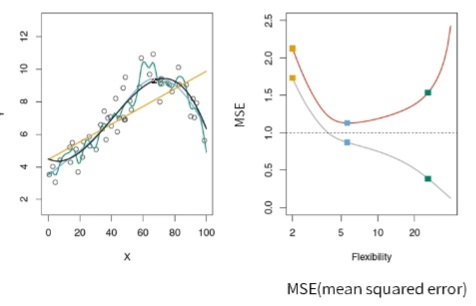

- **검은색** : 실제 $f$를 나타내는 모형
- **노란색** : 가장 낮은 복잡도를 가지므로 편파성이 높아져 가장 높은 MSE 값을 가짐
- **초록색** : 가장 높은 복잡도를 가지므로 학습 집합에 과적합되어 분산이 높아짐. 따라서 검증 데이터의 MSE가 하늘색에 비해 상승함
- **하늘색** : 검은색 모형고 가장 유사한 형태로, 분산과 편파성이 모두 적절히 낮아져 검증 데이터의 MSE가 가장 낮음
- 전체적으로 간단한 모형일수록 underfitting, 복잡한 모형일수록 overfitting이 일어나기 쉬움
  - overfitting : 학습 데이터에만 맞아버리는 현상

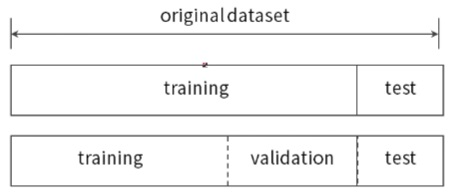

### 데이터 분할
- 과적합을 방지하기 위해 전체 데이터를 학습 데이터, 검증, 데이터, 테스트 데이터로 나누며 보통 비율은 5:3:2로 정함
  - 학습 데이터(training data) : 모형 f를 추정하는데 필요
  - 검증 데이터(validation data) : 추정한 모형 f가 적합한지 검증함
    - validation의 성능을 보고 hyper parameter(K)의 값을 정한다.
  - 테스트 데이터(test data) : 최종적으로 선택한 모형의 성능을 평가

- k-Fold 교차검증(k-Fold Cross Validation)
  - 모형의 적합성을 보다 객관적으로 평가하기 위한 방법
  - 데이터를 k(주로 5 또는 10)개 부분으로 나눈 뒤, 그 중 하나를 검증 집합, 나머지를 학습 집합으로 분류
  - 위 과정을 k번 반복하고 k개의 성능 지표를 평균하여 모형의 적합성을 평가

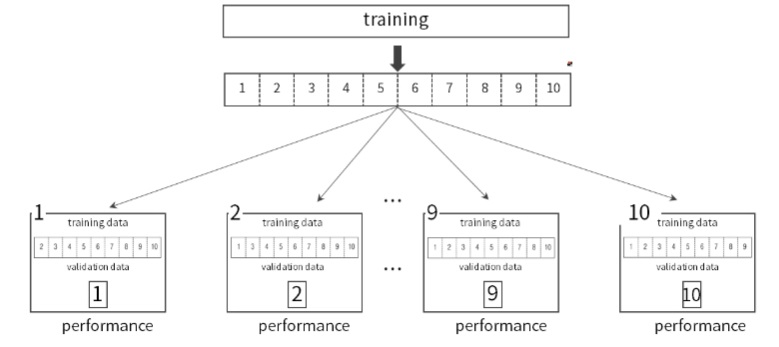

- LOOCV(Leave-One-Out Cross Validation)
  - 데이터의 수가 적을 때 사용하는 교차검증 방법
    - Validation data에 따라 그 결과가 현저히 달라질 정도로 데이터 수가 적을 때 사용
  - 총 n(데이터 수 만큼)개의 모델을 만드는데, 각 모델은 하나의 샘플만 제외하면서 모델을 만들고, 제외한 샘플로 성능 지표를 계산함.
  - 이렇게 도출된 n개의 성능 지표 평균을 내어 최종 성능 지표를 도출한다.

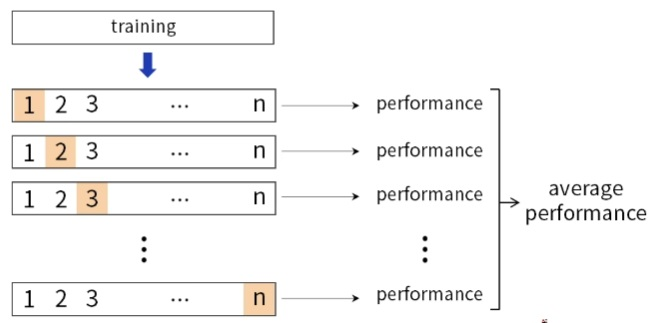

### 데이터셋의 크기에 따라(큼->작음) 5:3:2 분할 -> k-Fold Cross -> LOOCV 순으로 고려를 해보도록 한다.

### 데이터의 분석 과정
1. raw data
2. 전처리된 데이터
3. 실험설계
4. 모델 추출

### 전처리
- Raw data를 모델링할 수 있도록 데이터를 병합 및 파생 변수 생성
- ex) 게임 유저 이탈 예측 문제
- 어떤 변수가 게임의 이탈에 영향을 끼칠까?
- feature를 잘 만들면 어떤 모델을 써도 확률이 올라갈 수밖에 없다

### 실험 설계
- test데이터는 실제로 우리가 모델을 적용한다는 가정하여야 한다.
- Train, validation 데이터에 test 정보는 없어야 한다.

1. 단계별, 시간에 따라 결과가 변화하는 결과에 대해서는 케이스를 나누는 것이 유효하지 않을 수 있다.
2. **class imbalance - 경우의 수가 정말 작을 경우 발생하는 문제**

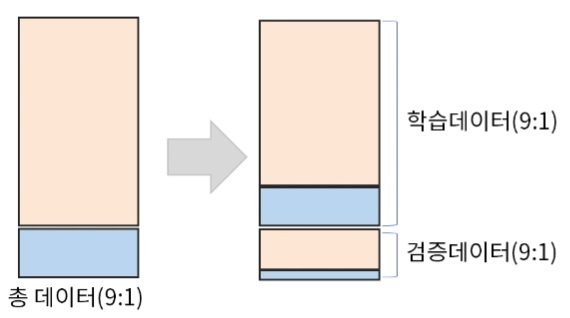

- 학습데이터와 검증데이터 모두를 9:1의 비율로 나누고 샘플링을 진행하여야 한다.
- 이렇게 만들어진 학습데이터의 샘플링 과정을 거쳐 5:5 비율로 만들어내고
- 이후 9:1로 유지되어있던 검증데이터에 접목시켜 검증하는 방법이 필요하다.

#### 테스트 데이터는 아예 우리가 본적도 없는, 사용해본 적 없는 데이터를 가지고 진행을 하여야 한다.